# Exploratory Data Analysis - Telco Churn Dataset

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [0]:
df = pd.read_csv("Data/Telco-Customer-Churn.csv")

In [0]:
# Data cleaning & pre-processing for visualization 

#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

#convert to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})
    
#replace values in SeniorCitizen Column
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [93]:
#Tenure to categorical column, we want to group customers for better visualization. 
def tenure_lab(df) :
    
    if df["tenure"] <= 12 :
        return "Tenure 0-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "Tenure 12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "Tenure 24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "Tenure 48-60"
    elif df["tenure"] > 60 :
        return "Tenure > 60"
    
df["tenure_group"] = df.apply(lambda df:tenure_lab(df),axis = 1)

print(df['tenure_group'].value_counts())

Tenure 0-12     2175
Tenure 24-48    1594
Tenure > 60     1407
Tenure 12-24    1024
Tenure 48-60     832
Name: tenure_group, dtype: int64


In [94]:
tenureGroups = df['tenure_group'].value_counts().keys().tolist()
tenureGroupsvals = df['tenure_group'].value_counts().values.tolist()

print(tenureGroups)
print(tenureGroupsvals)

['Tenure 0-12', 'Tenure 24-48', 'Tenure > 60', 'Tenure 12-24', 'Tenure 48-60']
[2175, 1594, 1407, 1024, 832]


In [95]:
# bringing the labels in the right logical order
order = [0,3,1,4,2]
tenureGroups = [tenureGroups[i] for i in order]
tenureGroups

['Tenure 0-12', 'Tenure 12-24', 'Tenure 24-48', 'Tenure 48-60', 'Tenure > 60']

In [96]:
#Separating categorical columns and numerical columns.    

Id_col = ['customerID']
target_col = ['Churn']
gender = ['gender']

#Using 6 to separate, because we have 5 tenure groups as categorical max unique values. 
categorical_cols = df.nunique()[df.nunique() < 6].keys().tolist()

#Omitting the target from categorical columns.

cat_cols = [x for x in categorical_cols if x not in target_col + gender]
print(cat_cols)

num_cols = [x for x in df.columns if x not in target_col + Id_col + cat_cols]
print(num_cols)

['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']
['gender', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [0]:
# Separating churned customers from not churned onces. 
churningCustomers = df[df['Churn'] == 'Yes']['Churn']
nonChurningCustomers = df[df['Churn'] == 'No']['Churn']

#labels
lab = df["Churn"].value_counts().keys().tolist()
#values
val = df["Churn"].value_counts().values.tolist()

In [98]:
# This function converts a dataframes column to labels and values for plotting. 

def toLabelsAndValues(dataframe,column):
    
    labels = dataframe[column].value_counts().keys().tolist()
    
    values = dataframe[column].value_counts().values.tolist()
    
    return labels, values 

toLabelsAndValues(df,'Churn')

(['No', 'Yes'], [5163, 1869])

## Churning customers and non-churning customers

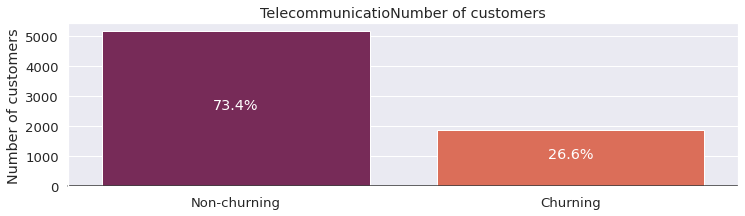

In [99]:
f,ax = plt.subplots(figsize=(12, 3))
sns.set(font_scale=1.2)
ax = sns.barplot(x=lab, y=val, palette="rocket")
ax.axhline(0, color="k", clip_on=False)
ax.set_title('TelecommunicatioNumber of customers')
ax.set_xticklabels(["Non-churning", "Churning"], rotation=0, horizontalalignment='center')
ax.set_ylabel("Number of customers")

TotalCustomers = len(df)
total = TotalCustomers

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y), color="white",  ha='center')


# We can see that the majority of customers did not churn. 
# 26.54 % of the customers churned. 

In [0]:
# To keep code clean when plotting the upcmingg graphs, we define a small utility function that plots a graph similar to the one above
def makeChart(figsize=(12, 6), title='Chart title', xticklabels = [], x=[], y= [], ylabel='Y label', xlabel='Y label', total=1):
  f,ax = plt.subplots(figsize=figsize)
  sns.set(font_scale=1.2)
  ax = sns.barplot(x=x, y=y, palette="rocket")
  ax.axhline(0, color="k", clip_on=False)
  ax.set_title(title)
  ax.set_xticklabels(xticklabels, rotation=0, horizontalalignment='center')
  ax.set_ylabel(ylabel)
  ax.set_xlabel(xlabel)


  for p in ax.patches:
          percentage = '{:.1f}%'.format(100 * p.get_height()/total)
          x = p.get_x() + p.get_width()/2
          y = p.get_y() + p.get_height()/2
          bbox_props = dict(boxstyle="round", fc="w", ec="0.75", alpha=0.9)
          ax.annotate(percentage, (x,y), color='black', ha='center', bbox=bbox_props)


## Tenure

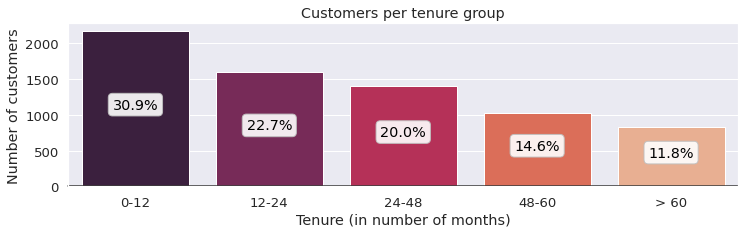

In [101]:
makeChart(figsize=(12, 3), 
          x=tenureGroups,
          y=tenureGroupsvals,
          title='Customers per tenure group', 
          xticklabels=["0-12", "12-24", "24-48", "48-60","> 60"],
          ylabel='Number of customers',
          xlabel='Tenure (in number of months)',
          total = len(df)
          )

# Most customers were subscribed 0 to 12 months. The longer the subscription time the less customers.

## Tenure groups

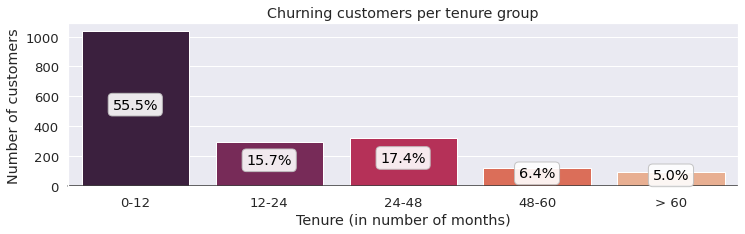

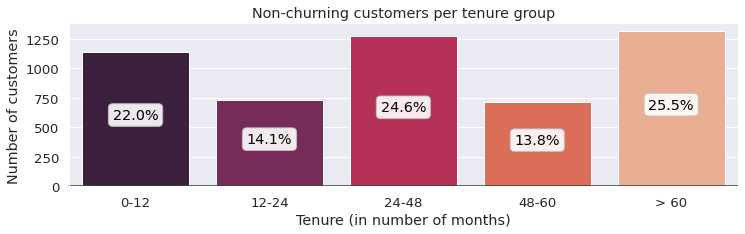

In [102]:
churningPerTenureGroup = churningCustomers.groupby(df['tenure_group']).value_counts().values.tolist()
nonChurningPerTenureGroup = nonChurningCustomers.groupby(df['tenure_group']).value_counts().values.tolist()

makeChart(figsize=(12, 3), 
          x=tenureGroups,
          y=churningPerTenureGroup,
          title='Churning customers per tenure group', 
          xticklabels=["0-12", "12-24", "24-48", "48-60","> 60"],
          ylabel='Number of customers',
          xlabel='Tenure (in number of months)',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=tenureGroups,
          y=nonChurningPerTenureGroup,
          title='Non-churning customers per tenure group', 
          xticklabels=["0-12", "12-24", "24-48", "48-60","> 60"],
          ylabel='Number of customers',
          xlabel='Tenure (in number of months)',
          total = len(nonChurningCustomers)
          )

# We can observe the overall trend is customers that churn less often the longer they are subscribed.  
# Most churns happen in the segments 0-12 months.

## Gender 

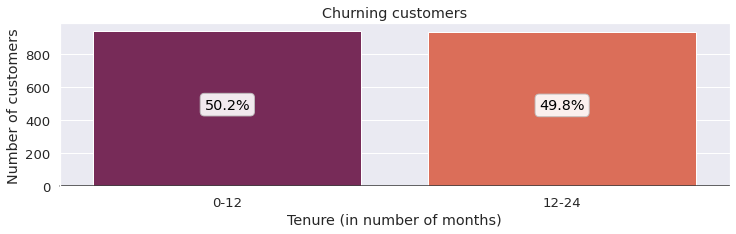

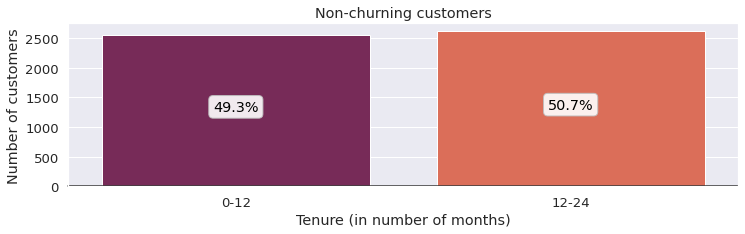

In [103]:
# Preparing the Churn for Gender Column to be plotted. 
gender_labels = df['gender'].value_counts().keys().tolist()
gender_values = df['gender'].value_counts().values.tolist()
churningPerGender = churningCustomers.groupby(df['gender']).value_counts().values.tolist()
nonChurningnPerGender = nonChurningCustomers.groupby(df['gender']).value_counts().values.tolist()

makeChart(figsize=(12, 3), 
          x=gender_labels,
          y=churningPerGender,
          title='Churning customers', 
          xticklabels=["0-12", "12-24", "24-48", "48-60","> 60"],
          ylabel='Number of customers',
          xlabel='Tenure (in number of months)',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=gender_labels,
          y=nonChurningnPerGender,
          title='Non-churning customers', 
          xticklabels=["0-12", "12-24", "24-48", "48-60","> 60"],
          ylabel='Number of customers',
          xlabel='Tenure (in number of months)',
          total = len(nonChurningCustomers)
          )
# We can see that the gender of customers that churn and that don't churn is close to a 50/50 distribution.
# Hence, when developing a strategy against churn, focus on gender would not matter. 

## Senior Citizens

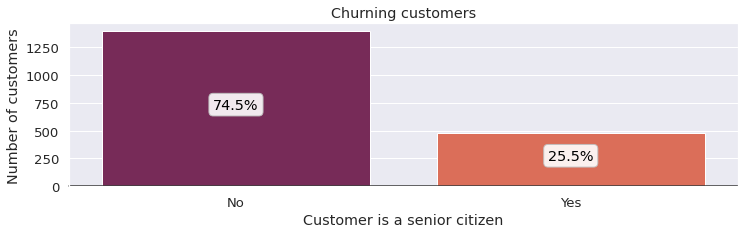

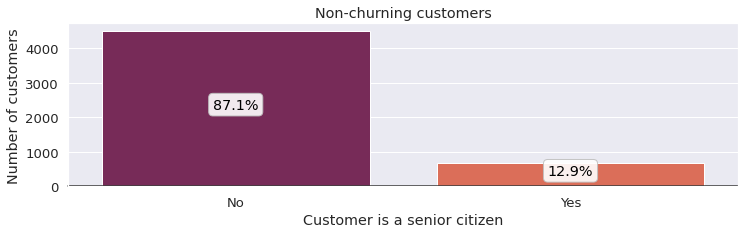

In [104]:
# Preparing the SeniorCitizen Column to be plotted. 
sc_labels = df['SeniorCitizen'].value_counts().keys().tolist()
sc_values = df['SeniorCitizen'].value_counts().values.tolist()
ChurnPerSc = churningCustomers.groupby(df['SeniorCitizen']).value_counts().values.tolist()
NoChurnPerSc = nonChurningCustomers.groupby(df['SeniorCitizen']).value_counts().values.tolist()   

makeChart(figsize=(12, 3), 
          x=sc_labels,
          y=ChurnPerSc,
          title='Churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customer is a senior citizen',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=sc_labels,
          y=NoChurnPerSc,
          title='Non-churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customer is a senior citizen',
          total = len(nonChurningCustomers)
          )
# Out of the total of 1869 customers that churned 74.5 % are senior citizens. This means that a customer loyalty
# programme or strategy should clearly address the needs of the elderly in order to retain them.


## Partners

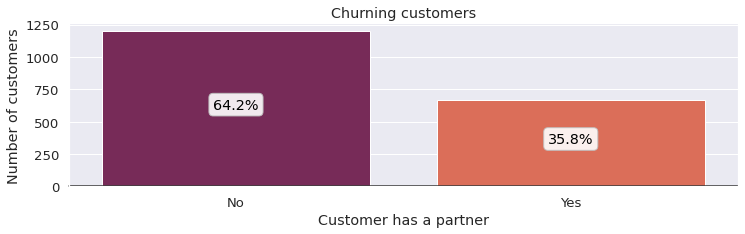

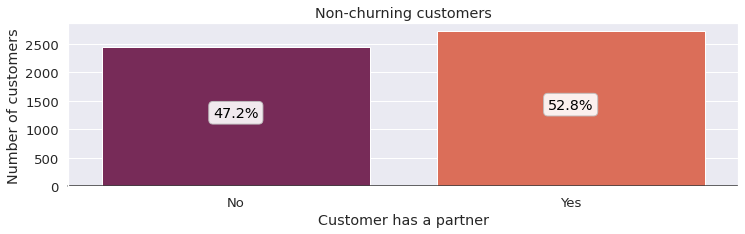

In [105]:
# Preparing the Partner Column to be plotted. 
p_labels = df['Partner'].value_counts().keys().tolist()
p_values = df['Partner'].value_counts().values.tolist()
churningHasPartner = churningCustomers.groupby(df['Partner']).value_counts().values.tolist()
nonChurningHasPartner = nonChurningCustomers.groupby(df['Partner']).value_counts().values.tolist()

makeChart(figsize=(12, 3), 
          x=p_labels,
          y=churningHasPartner,
          title='Churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customer has a partner',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=p_labels,
          y=nonChurningHasPartner,
          title='Non-churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customer has a partner',
          total = len(nonChurningCustomers)
          )
# 64.2% of customers that churned did not have a partner. A loyalty / retainment strategy should therefore
# primarily focus oNumber of customers that do not have partners. 

## Dependents

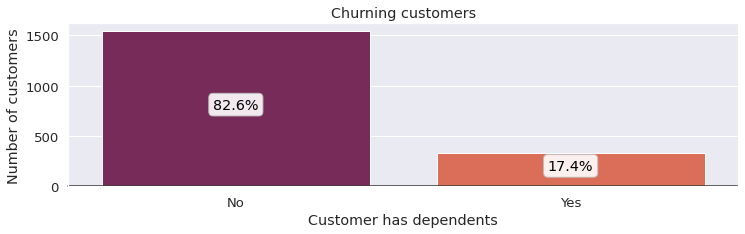

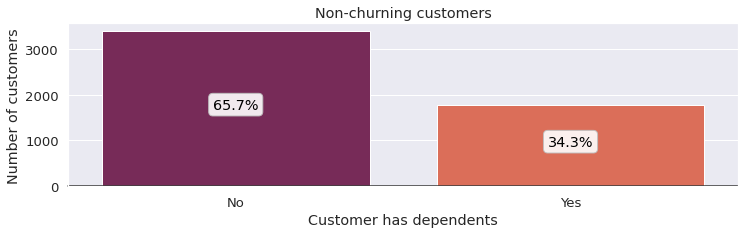

In [106]:
# Preparing the Dependents Column to be plotted. 
d_labels = df['Dependents'].value_counts().keys().tolist()
d_values = df['Dependents'].value_counts().values.tolist()
churningHasDependents = churningCustomers.groupby(df['Dependents']).value_counts().values.tolist()
nonChurningHasDependents = nonChurningCustomers.groupby(df['Dependents']).value_counts().values.tolist()

makeChart(figsize=(12, 3), 
          x=d_labels,
          y=churningHasDependents,
          title='Churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customer has dependents',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=d_labels,
          y=nonChurningHasDependents,
          title='Non-churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customer has dependents',
          total = len(nonChurningCustomers)
          )


# 82.6% of customers that churned do have dependents. Therefore a loyalty programme or retainment strategy
# could include dependents in a strategical way. 

##  Phone Service 

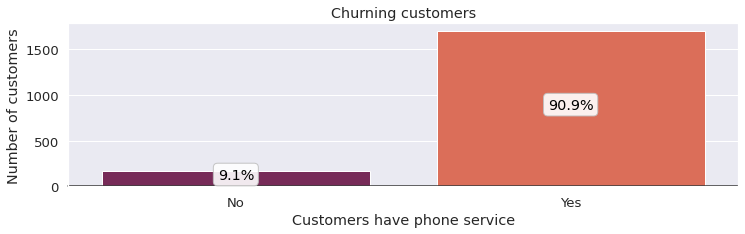

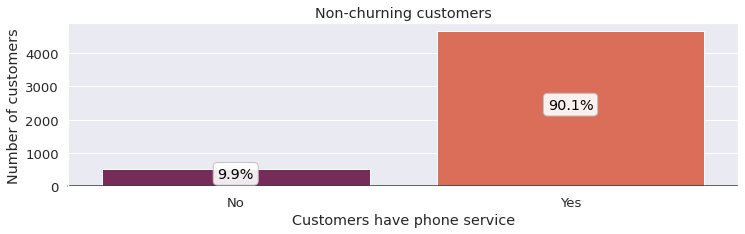

In [107]:
# Preparing PhoneService to be plotted. 
ps_labels = df['PhoneService'].value_counts().keys().tolist()
ps_values = df['PhoneService'].value_counts().values.tolist()
churningWithPhoneService = churningCustomers.groupby(df['PhoneService']).value_counts().values.tolist()
nonChurningWithPhoneService = nonChurningCustomers.groupby(df['PhoneService']).value_counts().values.tolist()

makeChart(figsize=(12, 3), 
          x=ps_labels,
          y=churningWithPhoneService,
          title='Churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have phone service',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=ps_labels,
          y=nonChurningWithPhoneService,
          title='Non-churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have phone service',
          total = len(nonChurningCustomers)
          )


# 90.9% of customers that churned did not have the phone service. Hence, the telco company should try to 
# sell its customers more consistently the phone service, but it is unlikely to reduce churn, because 
# customers that did not churn also have no phone service (90.1%).

## Multiple Lines

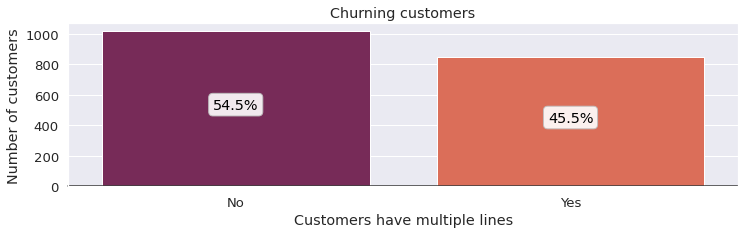

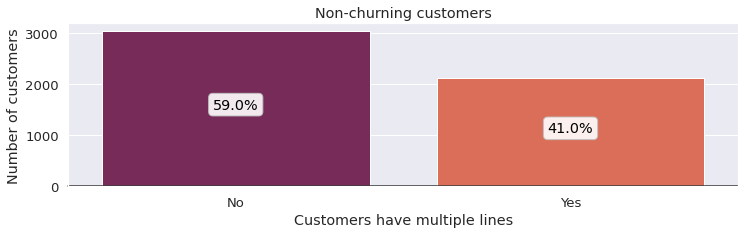

In [108]:
# Merging category 'no phone service into no because if a customer doesn't have the phone service he or she
# can't have multiple lines.

df['MultipleLines']  = df['MultipleLines'].replace({'No phone service' : 'No'})

# Preparing the 'MultipleLines' Column to be plotted. 
ms_labels = df['MultipleLines'].value_counts().keys().tolist()
ms_values = df['MultipleLines'].value_counts().values.tolist()
churningWithMultiLines = churningCustomers.groupby(df['MultipleLines']).value_counts().values.tolist()
nonChurningWithMultiLines = nonChurningCustomers.groupby(df['MultipleLines']).value_counts().values.tolist()

makeChart(figsize=(12, 3), 
          x=ms_labels,
          y=churningWithMultiLines,
          title='Churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have multiple lines',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=ms_labels,
          y=nonChurningWithMultiLines,
          title='Non-churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have multiple lines',
          total = len(nonChurningCustomers)
          )



## Internet Service

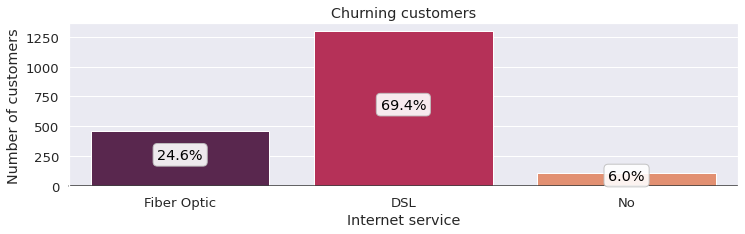

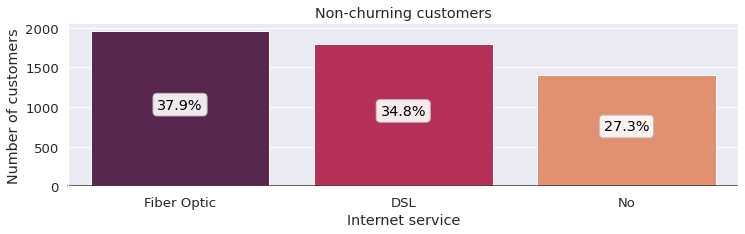

In [125]:
# Preparing the 'InternetService' Column to be plotted. 
is_labels = df['InternetService'].value_counts().keys().tolist()
is_values = df['InternetService'].value_counts().values.tolist()
churningWithInternetService = churningCustomers.groupby(df['InternetService']).value_counts().values.tolist()
nonChurningWithInternetService = nonChurningCustomers.groupby(df['InternetService']).value_counts().values.tolist()


makeChart(figsize=(12, 3), 
          x=is_labels,
          y=churningWithInternetService,
          title='Churning customers', 
          xticklabels=["Fiber Optic","DSL", "No"],
          ylabel='Number of customers',
          xlabel='Internet service',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=is_labels,
          y=nonChurningWithInternetService,
          title='Non-churning customers', 
          xticklabels=["Fiber Optic","DSL", "No"],
          ylabel='Number of customers',
          xlabel='Internet service',
          total = len(nonChurningCustomers)
          )

# 69.4% of customers that churned had DSL internet service. This indicates a potential upselling opportunity for
# the telco company to try to switch customers from DSL to Fiber Optic. It could also indicate potential issues
# with the DSL internet service the telco company is providing. 

## Online Security

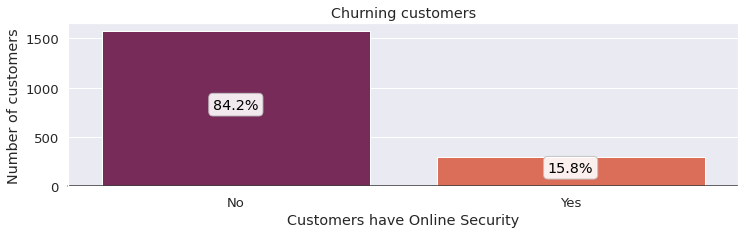

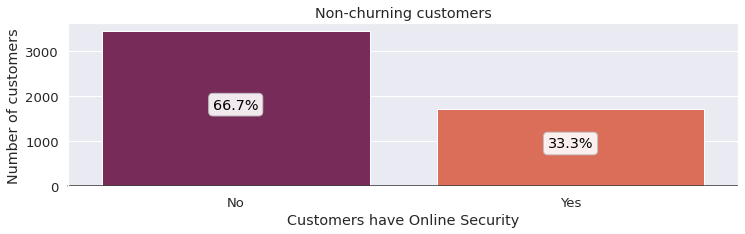

In [110]:
# Preparing the 'OnlineSecurity' Column to be plotted. 
os_labels = df['OnlineSecurity'].value_counts().keys().tolist()
os_values = df['OnlineSecurity'].value_counts().values.tolist()
churningWithOS = churningCustomers.groupby(df['OnlineSecurity']).value_counts().values.tolist()
nonChurningWithOS = nonChurningCustomers.groupby(df['OnlineSecurity']).value_counts().values.tolist()

makeChart(figsize=(12, 3), 
          x=os_labels,
          y=churningWithOS,
          title='Churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Online Security',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=os_labels,
          y=nonChurningWithOS,
          title='Non-churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Online Security',
          total = len(nonChurningCustomers)
          )

# 84.2% of customers that churned had no online security service. This offers another opportunity for the 
# Telco company to upsell its online security offering to the customers with internet service.
# However it is unlikely that this measure will reduce churn since 66.7% of non churned customers also do not
# have online security. 

## Online Backup

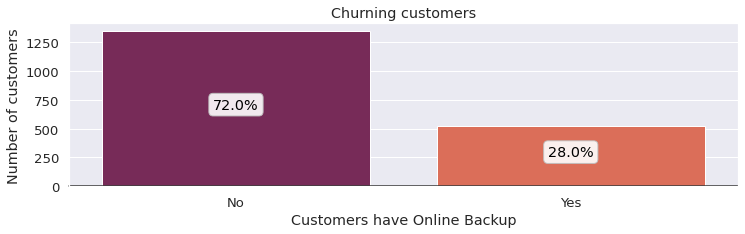

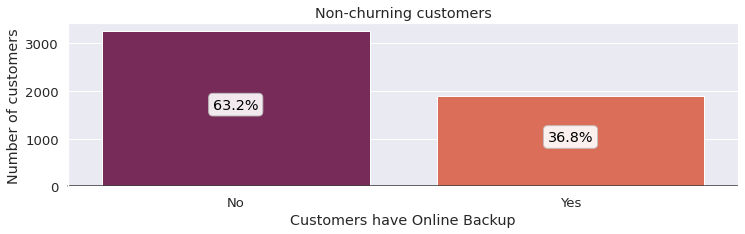

In [111]:
# Preparing the 'OnlineBackup' Column to be plotted. 
ob_labels = df['OnlineBackup'].value_counts().keys().tolist()
ob_values = df['OnlineBackup'].value_counts().values.tolist()
churningWithOB = churningCustomers.groupby(df['OnlineBackup']).value_counts().values.tolist()
nonChurningWithOB = nonChurningCustomers.groupby(df['OnlineBackup']).value_counts().values.tolist()


makeChart(figsize=(12, 3), 
          x=ob_labels,
          y=churningWithOB,
          title='Churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Online Backup',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=ob_labels,
          y=nonChurningWithOB,
          title='Non-churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Online Backup',
          total = len(nonChurningCustomers)
          )

# 72% of customers that churned did not have the service online backup. This again only offers an upselling or
# cross-selling potential because churn is unlikely to be reduced with this, since 63.2% of the customer base
# that didn't churn also doesn't have the online backup service. 

  ## Device Protection

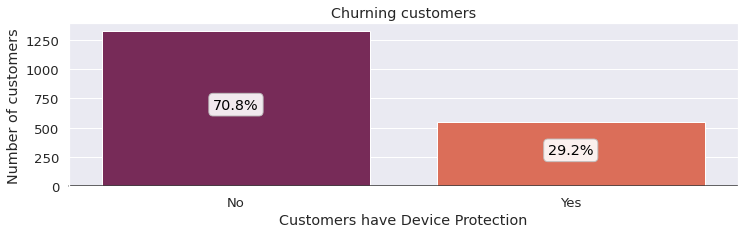

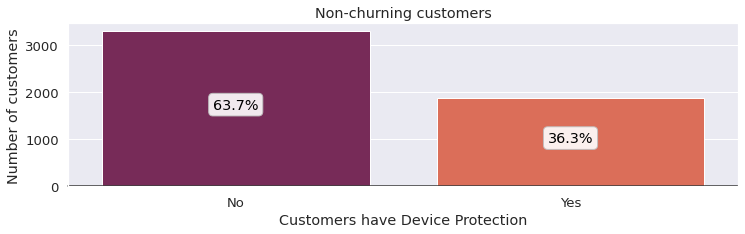

In [112]:
# Preparing the 'OnlineBackup' Column to be plotted. 
dp_labels = df['DeviceProtection'].value_counts().keys().tolist()
dp_values = df['DeviceProtection'].value_counts().values.tolist()
churningWithDP = churningCustomers.groupby(df['DeviceProtection']).value_counts().values.tolist()
nonChurningWithDP = nonChurningCustomers.groupby(df['DeviceProtection']).value_counts().values.tolist()


makeChart(figsize=(12, 3), 
          x=dp_labels,
          y=churningWithDP,
          title='Churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Device Protection',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=dp_labels,
          y=nonChurningWithDP,
          title='Non-churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Device Protection',
          total = len(nonChurningCustomers)
          )

# 70.8% of customers that churned did not have the device protection service. However also 63.7% of customers
# that did not churn also don't have the device protection, hence impact on churn most likely low. 

## Tech Support

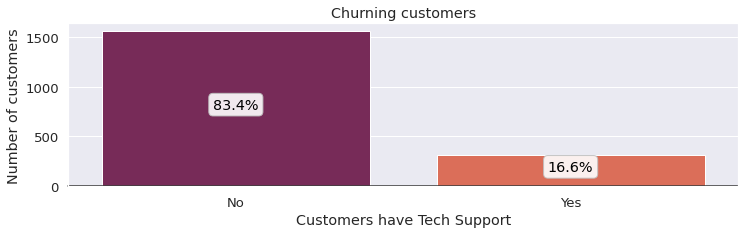

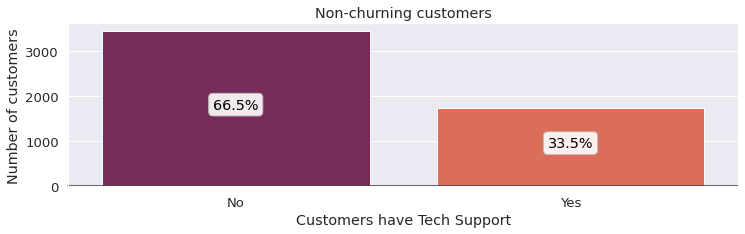

In [113]:
# Preparing the 'TechSupport' Column to be plotted. 
ts_labels = df['TechSupport'].value_counts().keys().tolist()
ts_values = df['TechSupport'].value_counts().values.tolist()
churningWithTS = churningCustomers.groupby(df['TechSupport']).value_counts().values.tolist()
nonChurningWithTS = nonChurningCustomers.groupby(df['TechSupport']).value_counts().values.tolist()

makeChart(figsize=(12, 3), 
          x=ts_labels,
          y=churningWithTS,
          title='Churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Tech Support',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=ts_labels,
          y=nonChurningWithTS,
          title='Non-churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Tech Support',
          total = len(nonChurningCustomers)
          )

# 83.4% of customers that churned had no technical support service booked. Again this feature is not a good
# indicator for churn reduction since 66.5% of the existing customers also does not pay for this service.

## TV Streaming

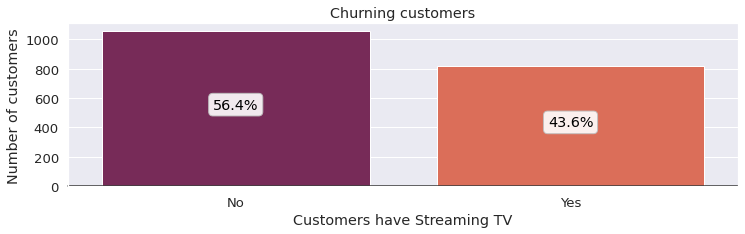

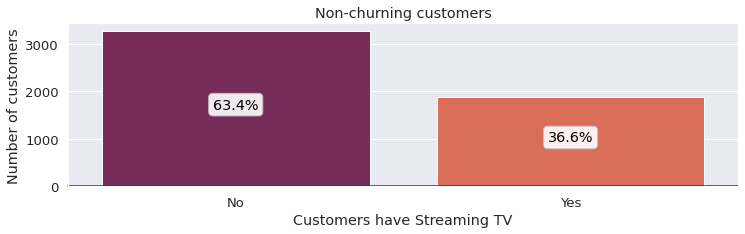

In [114]:
# Preparing the 'StreamingTV' Column to be plotted. 
st_labels = df['StreamingTV'].value_counts().keys().tolist()
st_values = df['StreamingTV'].value_counts().values.tolist()
churningWithST = churningCustomers.groupby(df['StreamingTV']).value_counts().values.tolist()
nonChurningWithST = nonChurningCustomers.groupby(df['StreamingTV']).value_counts().values.tolist()


makeChart(figsize=(12, 3), 
          x=st_labels,
          y=churningWithST,
          title='Churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Streaming TV',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=st_labels,
          y=nonChurningWithST,
          title='Non-churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Streaming TV',
          total = len(nonChurningCustomers)
          )

# 56.4% of customers that churned did not have the TV streaming service.

## Movie Streaming

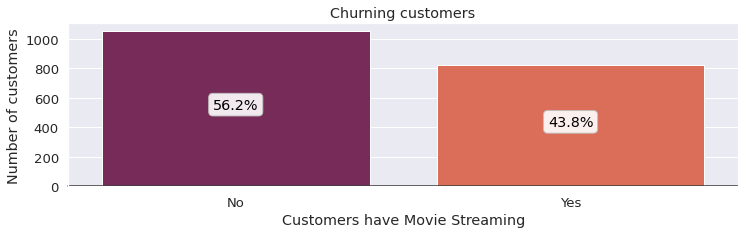

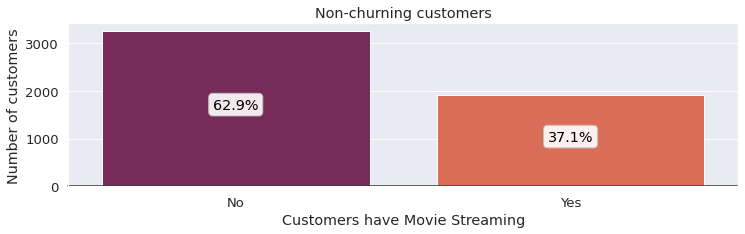

In [115]:
# Preparing the 'StreamingMovies' Column to be plotted. 
sm_labels = df['StreamingMovies'].value_counts().keys().tolist()
sm_values = df['StreamingMovies'].value_counts().values.tolist()
churningWithSM = churningCustomers.groupby(df['StreamingMovies']).value_counts().values.tolist()
nonChurningWithSM = nonChurningCustomers.groupby(df['StreamingMovies']).value_counts().values.tolist()


makeChart(figsize=(12, 3), 
          x=sm_labels,
          y=churningWithSM,
          title='Churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Movie Streaming',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=sm_labels,
          y=nonChurningWithSM,
          title='Non-churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Movie Streaming',
          total = len(nonChurningCustomers)
          )


# 56.2% of customers that churned did not have the Movie streaming service. 

   ## Contract type

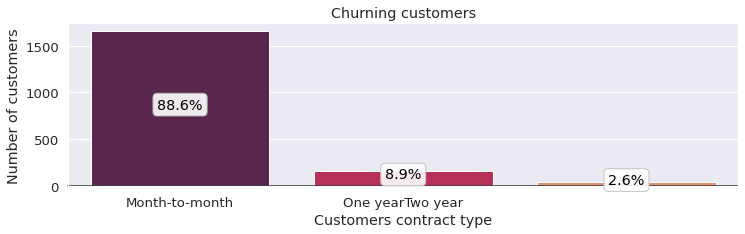

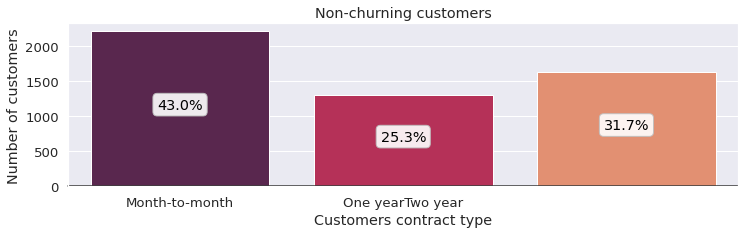

In [116]:
# Preparing the 'Contract' Column to be plotted. 
c_labels = df['Contract'].value_counts().keys().tolist()
c_values = df['Contract'].value_counts().values.tolist()
churningContractType = churningCustomers.groupby(df['Contract']).value_counts().values.tolist()
nonChurningContractType = nonChurningCustomers.groupby(df['Contract']).value_counts().values.tolist()

makeChart(figsize=(12, 3), 
          x=c_labels,
          y=churningContractType,
          title='Churning customers', 
          xticklabels=["Month-to-month", "One year" "Two year"],
          ylabel='Number of customers',
          xlabel='Customers contract type',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=c_labels,
          y=nonChurningContractType,
          title='Non-churning customers', 
          xticklabels=["Month-to-month", "One year" "Two year"],
          ylabel='Number of customers',
          xlabel='Customers contract type',
           total = len(nonChurningCustomers)
          )

# 88.6% of customers that churned were paying on a monthly basis. This fact indicates that the telco company
# should try to convert customers into the more long term contract agreements since churn is significantly
# lower within the one or two year contract types. 

## Paperless Billing

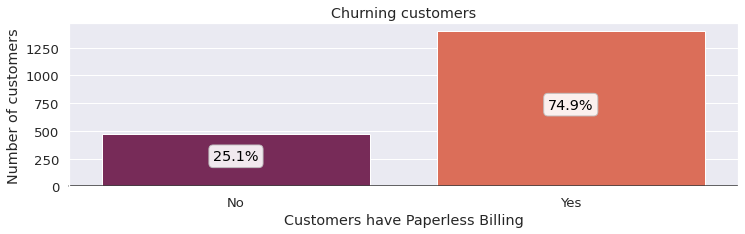

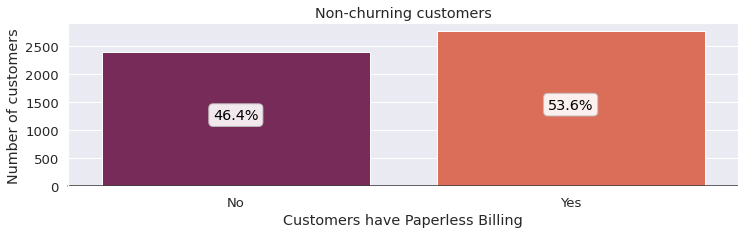

In [117]:
# Preparing the 'PaperlessBilling' Column to be plotted. 
pl_labels = df['PaperlessBilling'].value_counts().keys().tolist()
pl_values = df['PaperlessBilling'].value_counts().values.tolist()
churningWithpPB = churningCustomers.groupby(df['PaperlessBilling']).value_counts().values.tolist()
nonChurningWithPB = nonChurningCustomers.groupby(df['PaperlessBilling']).value_counts().values.tolist()

makeChart(figsize=(12, 3), 
          x=sm_labels,
          y=churningWithpPB,
          title='Churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Paperless Billing',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=sm_labels,
          y=nonChurningWithPB,
          title='Non-churning customers', 
          xticklabels=["No", "Yes"],
          ylabel='Number of customers',
          xlabel='Customers have Paperless Billing',
          total = len(nonChurningCustomers)
          )


# 74.9% of customers that churned did not have paperless billing, strongly indicating that this does affect the
# churn rate and should be therefore addressed by the telco company.

## Payment Method

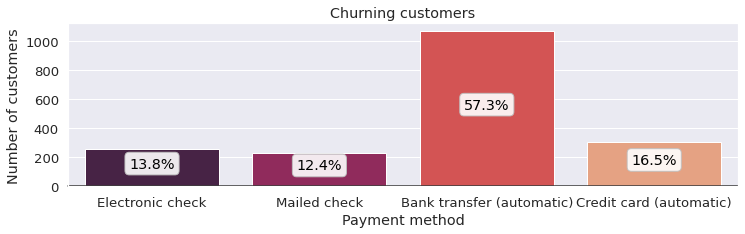

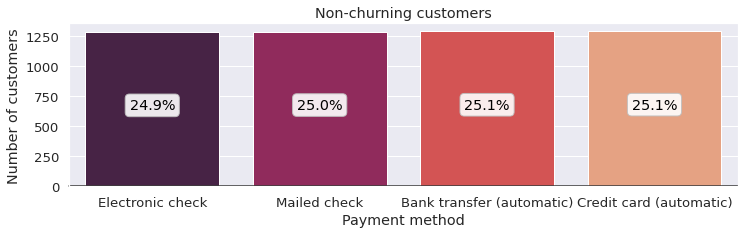

In [118]:
# Preparing the 'PaymentMethod' Column to be plotted. 
pm_labels = df['PaymentMethod'].value_counts().keys().tolist()
pm_values = df['PaymentMethod'].value_counts().values.tolist()
churningPM = churningCustomers.groupby(df['PaymentMethod']).value_counts().values.tolist()
nonChurningPM = nonChurningCustomers.groupby(df['PaymentMethod']).value_counts().values.tolist()

# Preparing the 'PaperlessBilling' Column to be plotted. 
pl_labels = df['PaperlessBilling'].value_counts().keys().tolist()
pl_values = df['PaperlessBilling'].value_counts().values.tolist()
churningWithpPB = churningCustomers.groupby(df['PaperlessBilling']).value_counts().values.tolist()
nonChurningWithPB = nonChurningCustomers.groupby(df['PaperlessBilling']).value_counts().values.tolist()

makeChart(figsize=(12, 3), 
          x=pm_labels,
          y=churningPM,
          title='Churning customers', 
          xticklabels=pm_labels,
          ylabel='Number of customers',
          xlabel='Payment method',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=pm_labels,
          y=nonChurningPM,
          title='Non-churning customers', 
          xticklabels=pm_labels,
          ylabel='Number of customers',
          xlabel='Payment method',
          total = len(nonChurningCustomers)
          )


# 57.3% of customers that churned used the automatic bank transfer payment method, indicating that
# the telco company should try to incentivize its customers to use one of the other three options. 

## Monthly Charges

In [0]:
#convert to float type
#df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)

def monthlyCharges_lab(df) :
    
    if df['MonthlyCharges'] <= int(36) :
        return "Bottom 25% Group 0-36$"
    elif (df['MonthlyCharges'] > 36) & (df['MonthlyCharges'] <= 71):
        return "50% Group 36-71$"
    elif (df['MonthlyCharges'] > 71) & (df['MonthlyCharges'] <= 90) :
        return "75% Group 71-90$"
    elif df['MonthlyCharges'] > 90 :
        return "Top 25% Group >90$"

In [120]:
df['MonthlyCharges'] = df.apply(lambda df:monthlyCharges_lab(df),axis = 1)
df['MonthlyCharges'].head()

0    Bottom 25% Group 0-36$
1          50% Group 36-71$
2          50% Group 36-71$
3          50% Group 36-71$
4          50% Group 36-71$
Name: MonthlyCharges, dtype: object

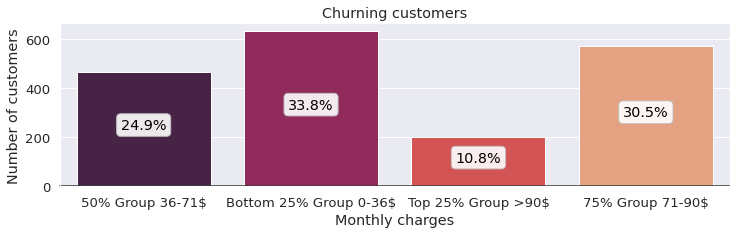

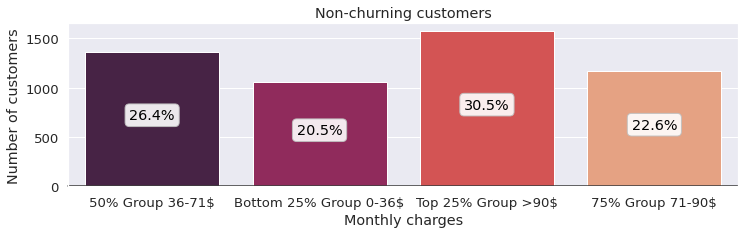

In [121]:
mc_labels = df['MonthlyCharges'].value_counts().keys().tolist()
mc_values = df['MonthlyCharges'].value_counts().values.tolist()
churningMC = churningCustomers.groupby(df['MonthlyCharges']).value_counts().values.tolist()
nonChurningMC = nonChurningCustomers.groupby(df['MonthlyCharges']).value_counts().values.tolist()


makeChart(figsize=(12, 3), 
          x=mc_labels,
          y=churningMC,
          title='Churning customers', 
          xticklabels=mc_labels,
          ylabel='Number of customers',
          xlabel='Monthly charges',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=mc_labels,
          y=nonChurningMC,
          title='Non-churning customers', 
          xticklabels=mc_labels,
          ylabel='Number of customers',
          xlabel='Monthly charges',
          total = len(nonChurningCustomers)
          )

# The four different customer groups spent: Bottom 25% Group 0-36$, 50% Group 36-71$, 75% Group 71-90$,
# Top 25% Group >90$. Most customers churned from the two groups paying monthly: 0-36$ and 71-90$.

## Total Charges

In [0]:
# Preparing the TotalCharges Column for plotting. 

def TotalCharges_lab(df) :
    if df['TotalCharges'] <= 402 :
        return "Group 0-402$"
    elif (df['TotalCharges'] > 402) & (df['TotalCharges'] <= 1397):
        return "Group 402-1397$"
    elif (df['TotalCharges'] > 1397) & (df['TotalCharges'] <= 3795) :
        return "Group 1397-3795$"
    elif df['TotalCharges'] > 3795 :
        return "Group >3795$"

In [123]:
df['TotalCharges'] = df.apply(lambda df: TotalCharges_lab(df),axis = 1)
df['TotalCharges'].head()

0        Group 0-402$
1    Group 1397-3795$
2        Group 0-402$
3    Group 1397-3795$
4        Group 0-402$
Name: TotalCharges, dtype: object

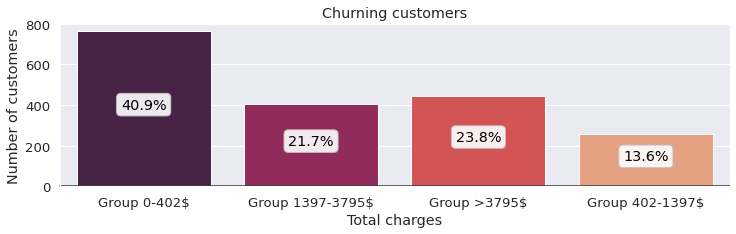

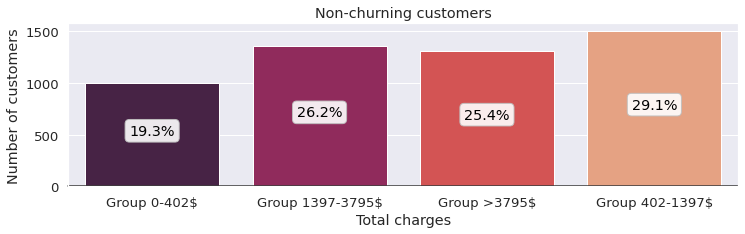

In [124]:
tc_labels = df['TotalCharges'].value_counts().keys().tolist()
tc_values = df['TotalCharges'].value_counts().values.tolist()
churningTC = churningCustomers.groupby(df['TotalCharges']).value_counts().values.tolist()
nonChurningTC = nonChurningCustomers.groupby(df['TotalCharges']).value_counts().values.tolist()

makeChart(figsize=(12, 3), 
          x=tc_labels,
          y=churningTC,
          title='Churning customers', 
          xticklabels=tc_labels,
          ylabel='Number of customers',
          xlabel='Total charges',
          total = len(churningCustomers)
          )

makeChart(figsize=(12, 3), 
          x=tc_labels,
          y=nonChurningTC,
          title='Non-churning customers', 
          xticklabels=tc_labels,
          ylabel='Number of customers',
          xlabel='Total charges',
          total = len(nonChurningCustomers)
          )


# 40.9% of customers that churned were charged less or equal to 402$ in bills. The general trend shows the more
# was charged the less customers had churned which makes sense in the context of the 3 different contract types
# and that mostly monthly paying customers churn because they aren't as locked in to the service as the one or
# two year contract customers.